In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [230]:
matches = pd.read_csv('C:/Users/Hp/Desktop/WPL/matches.csv')
deliveries = pd.read_csv('C:/Users/Hp/Desktop/WPL/deliveries.csv')

In [231]:
all_matches = matches[(matches['team1'].isin(['Rajasthan Royals', 'Mumbai Indians'])) & (matches['team2'].isin(['Rajasthan Royals', 'Mumbai Indians']))]

In [232]:
data = pd.merge(matches, deliveries, how = "inner", left_on = 'id', right_on = 'match_id')

In [233]:
sub_data = data[(data['team1'].isin(['Rajasthan Royals', 'Mumbai Indians'])) & (data['team2'].isin(['Rajasthan Royals', 'Mumbai Indians']))]

### Who will win the match?

In [234]:
all_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
85,86,2008,Mumbai,5/7/2008,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,7,A Nehra,Dr DY Patil Sports Academy,DJ Harper,RE Koertzen,NaN
112,113,2008,Jaipur,5/26/2008,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,5,Sohail Tanvir,Sawai Mansingh Stadium,BF Bowden,K Hariharan,NaN
159,160,2009,Durban,5/14/2009,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Rajasthan Royals,2,0,SK Warne,Kingsmead,BR Doctrove,DJ Harper,NaN
175,176,2010,Mumbai,3/13/2010,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Mumbai Indians,4,0,YK Pathan,Brabourne Stadium,RE Koertzen,RB Tiffin,NaN
218,219,2010,Jaipur,4/11/2010,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Mumbai Indians,37,0,SR Tendulkar,Sawai Mansingh Stadium,BR Doctrove,SK Tarapore,NaN


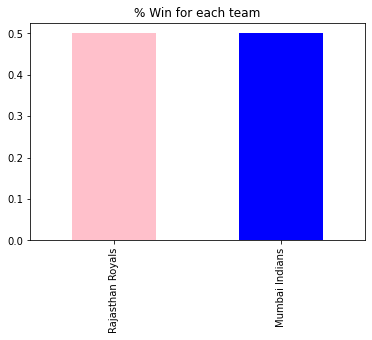

In [235]:
all_matches['winner'].value_counts(normalize=True).plot.bar(title='% Win for each team', color = ['pink', 'Blue'])

In [236]:
all_matches.groupby('venue')['winner'].value_counts()

venue                         winner          
Brabourne Stadium             Mumbai Indians      1
Dr DY Patil Sports Academy    Mumbai Indians      1
Eden Gardens                  Mumbai Indians      1
Kingsmead                     Rajasthan Royals    1
Sardar Patel Stadium, Motera  Mumbai Indians      1
                              Rajasthan Royals    1
Sawai Mansingh Stadium        Rajasthan Royals    5
                              Mumbai Indians      2
Wankhede Stadium              Mumbai Indians      4
                              Rajasthan Royals    3
Name: winner, dtype: int64

In [237]:
sub_data[(sub_data['venue']=='Sawai Mansingh Stadium') & (sub_data['season']>2015)].groupby(['match_id', 'inning', 'batting_team'])['batsman_runs'].sum()

match_id  inning  batting_team    
7914      1       Mumbai Indians      167
          2       Rajasthan Royals    168
11327     1       Mumbai Indians      162
          2       Rajasthan Royals    162
Name: batsman_runs, dtype: int64

In [238]:
sub_data[(sub_data['venue'] =='Sawai Mansingh Stadium') & (sub_data['season']>2015)].groupby(['match_id', 'inning','bowling_team'])['player_dismissed'].count()

match_id  inning  bowling_team    
7914      1       Rajasthan Royals    7
          2       Mumbai Indians      7
11327     1       Rajasthan Royals    5
          2       Mumbai Indians      5
Name: player_dismissed, dtype: int64

In [239]:
all_matches.groupby(['toss_winner'])['toss_decision'].value_counts()

toss_winner       toss_decision
Mumbai Indians    bat              5
                  field            2
Rajasthan Royals  field            9
                  bat              4
Name: toss_decision, dtype: int64

In [240]:
all_matches.groupby('toss_decision')['winner'].value_counts()

toss_decision  winner          
bat            Rajasthan Royals    5
               Mumbai Indians      4
field          Mumbai Indians      6
               Rajasthan Royals    5
Name: winner, dtype: int64

In [241]:
all_matches.groupby('winner')['player_of_match'].value_counts()

winner            player_of_match
Mumbai Indians    A Nehra            1
                  AP Tare            1
                  AT Rayudu          1
                  CJ Anderson        1
                  DR Smith           1
                  Harbhajan Singh    1
                  KA Pollard         1
                  MEK Hussey         1
                  SR Tendulkar       1
                  YK Pathan          1
Rajasthan Royals  JC Buttler         2
                  SPD Smith          2
                  AM Rahane          1
                  J Archer           1
                  J Botha            1
                  SK Warne           1
                  SR Watson          1
                  Sohail Tanvir      1
Name: player_of_match, dtype: int64

In [242]:
sub_data[(sub_data['batsman'].isin(['JC Buttler', 'SPD Smith'])) & (sub_data['season']>2015)].groupby(['match_id','batsman'])['batsman_runs'].sum()

match_id  batsman   
7914      JC Buttler     6
7940      JC Buttler    95
11318     JC Buttler    91
          SPD Smith     12
11327     SPD Smith     59
Name: batsman_runs, dtype: int64

### Batsman Intimidation Score(BIS)

In [243]:
sub_data1 = sub_data[sub_data['season']>2015]

In [244]:
dummy = pd.DataFrame(sub_data1.groupby('batsman')['ball'].count())

In [245]:
index = dummy[dummy['ball']>=10].index

In [246]:
sub_data1 = sub_data1[sub_data1['batsman'].isin(index)]

In [247]:
total_runs = sub_data1.groupby(['match_id','batsman'])['batsman_runs'].sum()

In [248]:
boundary_runs = sub_data1[sub_data1['batsman_runs'].isin([4, 6])].groupby(['match_id','batsman'])['batsman_runs'].sum()

In [249]:
nonbound_runs = sub_data1[sub_data1['batsman_runs'].isin([1, 2, 3])].groupby(['match_id','batsman'])['batsman_runs'].sum()

In [250]:
ball_faced = sub_data1.groupby(['match_id','batsman'])['ball'].count()

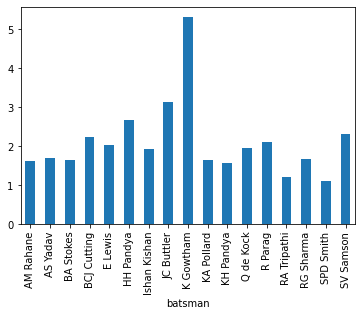

In [281]:
(((total_runs + boundary_runs) - (nonbound_runs * 0.5)) / ball_faced).sort_values(ascending=False).groupby('batsman').mean().plot.bar()

In [284]:
(sub_data1.groupby('batsman')['batsman_runs'].sum()/sub_data1.groupby('batsman')['ball'].count())*100

batsman
AM Rahane       118.390805
AS Yadav        135.714286
BA Stokes       135.483871
BCJ Cutting     150.000000
E Lewis         139.130435
HH Pandya       176.363636
Ishan Kishan    133.928571
JC Buttler      181.132075
K Gowtham       283.333333
KA Pollard       97.435897
KH Pandya        81.250000
Q de Kock       147.058824
R Parag         151.724138
RA Tripathi     100.000000
RG Sharma       126.829268
SPD Smith       112.698413
SV Samson       150.495050
dtype: float64

In [286]:
sub_data1[sub_data1['player_dismissed']=='JC Buttler'].groupby('bowler')['player_dismissed'].count()

bowler
JJ Bumrah    1
RD Chahar    1
Name: player_dismissed, dtype: int64

### # of runs scored of boundaries/ total runs scored

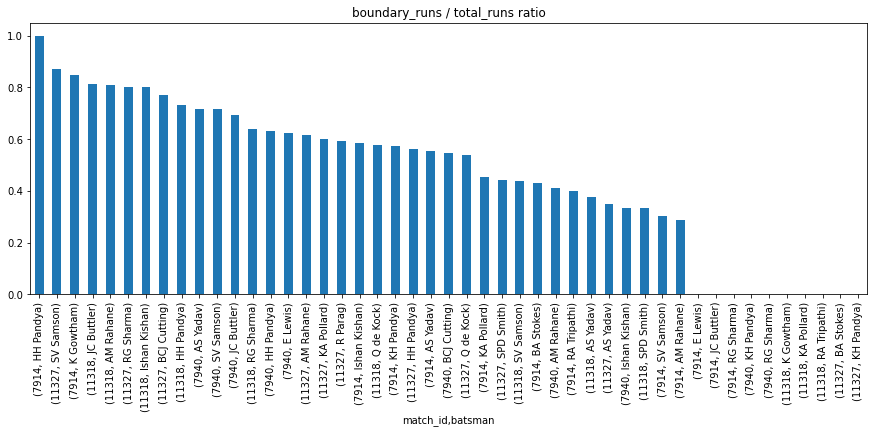

In [252]:
(boundary_runs/total_runs).sort_values(ascending=False).plot.bar(title='boundary_runs / total_runs ratio', figsize=(15,5))

In [289]:
(boundary_runs/total_runs).sort_values(ascending=False).groupby('batsman').mean().sort_values(ascending=False)

batsman
K Gowtham       0.848485
JC Buttler      0.753962
HH Pandya       0.731228
RG Sharma       0.719149
BCJ Cutting     0.657343
E Lewis         0.625000
R Parag         0.590909
SV Samson       0.581367
Ishan Kishan    0.573180
KH Pandya       0.571429
Q de Kock       0.557813
AM Rahane       0.530542
KA Pollard      0.527273
AS Yadav        0.498895
BA Stokes       0.428571
RA Tripathi     0.400000
SPD Smith       0.387006
Name: batsman_runs, dtype: float64

In [253]:
sub_data1[sub_data1['batsman_runs'].isin([4, 6])].groupby('batsman')['batsman_runs'].value_counts()

batsman       batsman_runs
AM Rahane     4               13
              6                1
AS Yadav      4               15
              6                5
BA Stokes     4                3
              6                1
BCJ Cutting   6                2
              4                1
E Lewis       4                4
              6                4
HH Pandya     4                7
              6                6
Ishan Kishan  4                6
              6                3
JC Buttler    4               17
              6               12
K Gowtham     4                4
              6                2
KA Pollard    6                2
              4                1
KH Pandya     4                1
Q de Kock     4               12
              6                6
R Parag       4                5
              6                1
RA Tripathi   4                1
RG Sharma     4                7
              6                1
SPD Smith     4                6
              6 

In [254]:
sub_data1[sub_data1['batsman_runs'].isin([4, 6])].groupby(['batsman', 'bowler'])['batsman_runs'].value_counts().sort_values(ascending=False)

batsman       bowler       batsman_runs
JC Buttler    A Joseph     4               6
Q de Kock     DS Kulkarni  4               5
SV Samson     KH Pandya    4               5
Q de Kock     J Archer     4               4
AS Yadav      K Gowtham    4               4
                                          ..
RG Sharma     K Gowtham    6               1
Ishan Kishan  BA Stokes    6               1
RG Sharma     S Gopal      4               1
SPD Smith     HH Pandya    4               1
SV Samson     SL Malinga   4               1
Name: batsman_runs, Length: 104, dtype: int64

### Diff between balls taken by MI and RR to reach 100 runs??

In [255]:
def team_total(df):
    runs = 0
    balls = 0
    
    for i in df.total_runs:
        if runs >= 100:
            break
        else:
            runs += i
            balls += 1
    return balls

In [256]:
def wickets_lost(df):
    balls = team_total(df)
    count = balls
    wickets = 0
    for i in df.player_dismissed_bool:
        if i != 0:
            wickets += 1
        count -= 1
    return wickets

In [257]:
mumbai_balls = sub_data[sub_data['batting_team']=='Mumbai Indians'].groupby(['match_id']).apply(team_total)

In [258]:
rajasthan_balls = sub_data[sub_data['batting_team']=='Rajasthan Royals'].groupby(['match_id']).apply(team_total)

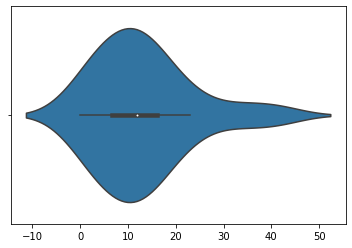

In [259]:
sns.violinplot(abs(mumbai_balls - rajasthan_balls))

In [287]:
abs(mumbai_balls - rajasthan_balls).describe()

count    20.00000
mean     13.25000
std      10.32562
min       0.00000
25%       6.75000
50%      12.00000
75%      16.00000
max      41.00000
dtype: float64

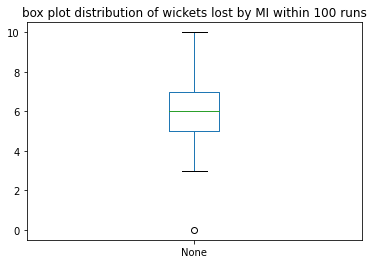

In [260]:
sub_data[sub_data['batting_team']=='Mumbai Indians'].groupby(['match_id']).apply(wickets_lost).plot.box(title='box plot distribution of wickets lost by MI within 100 runs')

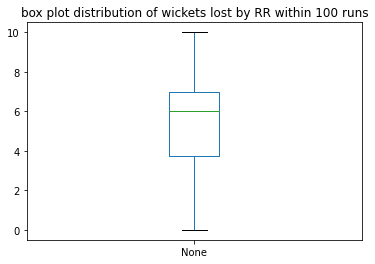

In [261]:
sub_data[sub_data['batting_team']=='Rajasthan Royals'].groupby(['match_id']).apply(wickets_lost).plot.box(title='box plot distribution of wickets lost by RR within 100 runs')

### Bowler Lethality Score(BLS)

In [262]:
dummy1 = pd.DataFrame(sub_data[sub_data['season']>2015].groupby(['match_id', 'bowler'])['over'].unique().apply(lambda x : len(x)))

In [263]:
index1 = dummy1[dummy1['over']<=1].index

In [264]:
for i,j in index1:
    sub_data.drop(sub_data[(sub_data['match_id']==i) & (sub_data['bowler']==j)].index, inplace=True)

In [265]:
def BLS(df):
    wickets_taken = df.groupby(['match_id', 'bowler'])['player_dismissed'].count()
    dot_balls_bowled = df[df['total_runs']==0].groupby(['match_id','bowler'])['ball'].count()
    boundary_runs = df[df['total_runs'].isin([4,6])].groupby(['match_id', 'bowler'])['total_runs'].sum()
    boundary_hit = df[df['total_runs'].isin([4,6])].groupby(['match_id', 'bowler'])['total_runs'].count()
    total_ball_bowled = df.groupby(['match_id', 'bowler'])['ball'].count()
    
    bls = ((wickets_taken + (dot_balls_bowled * 2)) - (boundary_runs/boundary_hit)) / (total_ball_bowled - (dot_balls_bowled * 2.5))
    return bls


In [266]:
bls_data = pd.DataFrame(BLS(sub_data))

In [267]:
bls_data.reset_index(inplace=True)

In [268]:
bls_data.rename(columns = {0 : 'BLS_score'}, inplace=True)

In [269]:
bls_data.drop(bls_data[bls_data['BLS_score'].isnull()].index, inplace=True)

In [270]:
bls_data = bls_data[(bls_data['BLS_score']>0)]

In [276]:
bowler_list = sub_data[sub_data['season']>2015]['bowler'].unique()

In [278]:
bls_data[bls_data['bowler'].isin(bowler_list)].groupby('bowler')['BLS_score'].mean()

bowler
A Joseph             0.991736
BA Stokes                 inf
DS Kulkarni               inf
HH Pandya            1.227106
J Archer             1.020000
JD Unadkat           3.442398
JJ Bumrah                 inf
K Gowtham            1.628187
KH Pandya            2.022840
M Markande           0.972222
MJ McClenaghan       1.924242
Mustafizur Rahman    0.850000
RD Chahar            0.777778
S Gopal              3.103175
SL Malinga           1.975316
Name: BLS_score, dtype: float64